In [24]:
import pandas as pd
import numpy as np
import torch
import sklearn.metrics as skm
import matplotlib.pyplot as plt

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
# load data
y_pred = pd.read_csv("/content/drive/MyDrive/[2023-02] 캡스톤디자인/PatchTST_이공즈.csv")
y_true_02 = pd.read_csv('/content/drive/MyDrive/[2023-02] 캡스톤디자인/true_y/2023-10-02.csv', index_col=0)
y_true_04 = pd.read_csv('/content/drive/MyDrive/[2023-02] 캡스톤디자인/true_y/2023-10-04.csv', index_col=0)
y_true_06 = pd.read_csv('/content/drive/MyDrive/[2023-02] 캡스톤디자인/true_y/2023-10-06.csv', index_col=0)
y_true_08 = pd.read_csv('/content/drive/MyDrive/[2023-02] 캡스톤디자인/true_y/2023-10-08.csv', index_col=0)
y_true_10 = pd.read_csv('/content/drive/MyDrive/[2023-02] 캡스톤디자인/true_y/2023-10-10.csv', index_col=0)

In [27]:
y_pred

,plant2_yhat,plant3_yhat,plant4_yhat,plant5_yhat,plant6_yhat,plant7_yhat,plant8_yhat
0,27.706449,28.138198,27.892363,27.930308,27.219794,26.747406,28.260838
1,27.701030,28.116927,27.871444,28.009401,27.264921,26.640726,28.157878
2,27.651145,28.095333,27.846212,27.913098,27.219174,26.597866,28.096388
3,27.668273,28.106118,27.849288,27.907684,27.189944,26.651806,28.102580
4,27.753612,28.105359,27.869639,27.915848,27.182680,26.626734,28.136546
...,...,...,...,...,...,...,...
360,25.825663,26.477197,26.102403,26.289601,25.451336,24.789415,26.509352
361,25.825664,26.477001,26.102764,26.289537,25.451289,24.789297,26.509367
362,25.825501,26.477184,26.102548,26.289504,25.451329,24.789332,26.509319
363,25.826086,26.477578,26.102540,26.289497,25.451308,24.789421,26.510231


In [28]:
temps_ind = []
cols = list(y_true_02.columns)

for i in range(2,9):
  temp = f'plant{i}_temperature'
  temps_ind.append(cols.index(temp))

temps_ind

[24, 31, 38, 45, 52, 59, 66]

In [29]:
y_true_02 = y_true_02.iloc[24:,temps_ind]
y_true_04 = y_true_04.iloc[24:,temps_ind]
y_true_06 = y_true_06.iloc[24:,temps_ind]
y_true_08 = y_true_08.iloc[24:,temps_ind]
y_true_10 = y_true_10.iloc[24:,temps_ind]

y_true = pd.concat([y_true_02,y_true_04,y_true_06,y_true_08, y_true_10], axis=0)
y_true.shape, y_pred.shape

((365, 7), (365, 7))

In [30]:
y_true = y_true.to_numpy()
y_pred = y_pred.to_numpy()
y_true.shape, y_pred.shape

((365, 7), (365, 7))

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

results_df = pd.DataFrame(columns=["mse", "mae", "mape"])
results_df.loc["test", "mse"] = mean_squared_error(y_true.flatten(), y_pred.flatten())
results_df.loc["test", "mae"] = mean_absolute_error(y_true.flatten(), y_pred.flatten())
results_df.loc["test", "mape"] = mean_absolute_percentage_error(y_true.flatten(), y_pred.flatten())
results_df

,mse,mae,mape
test,1.221994,0.924984,0.035651


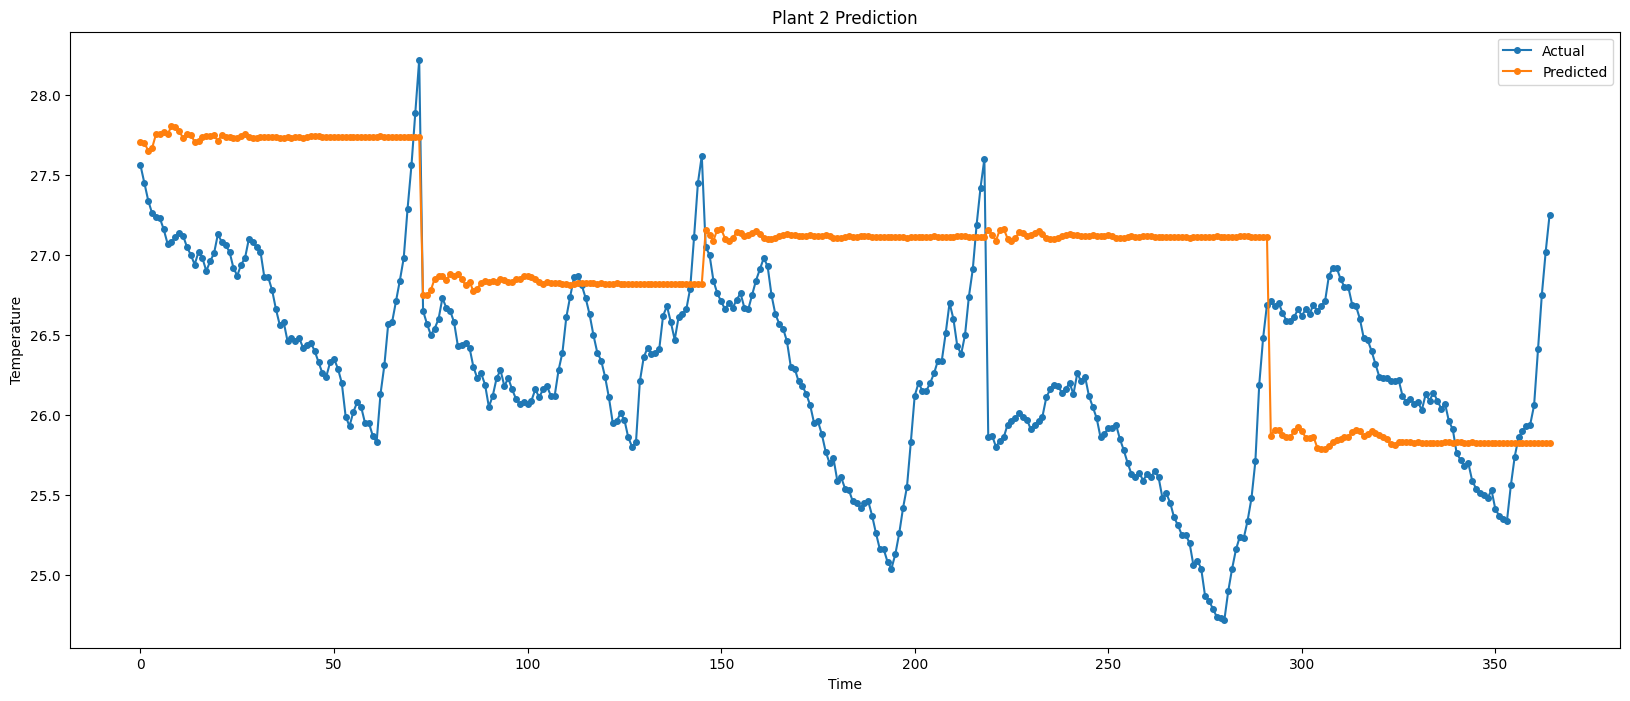

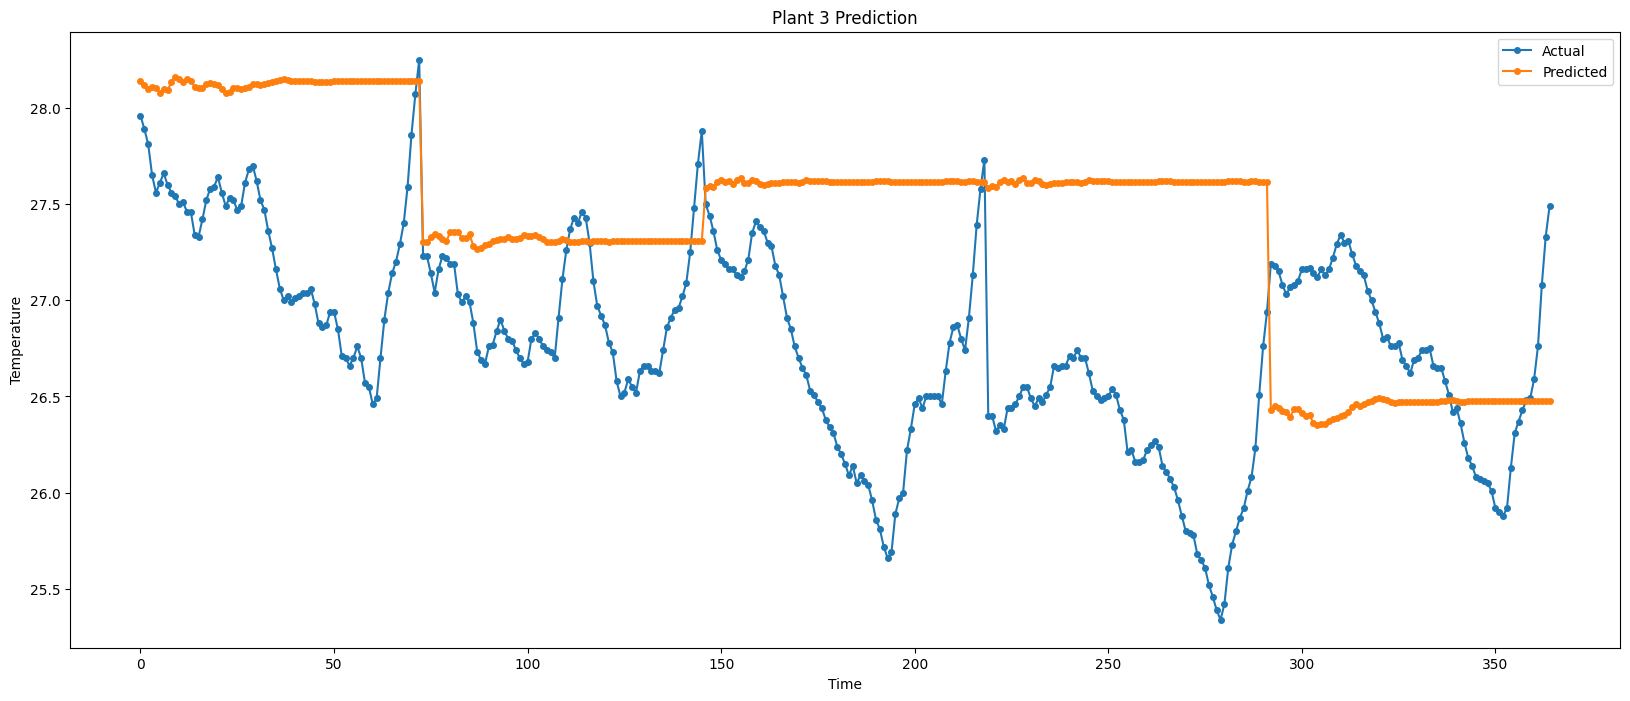

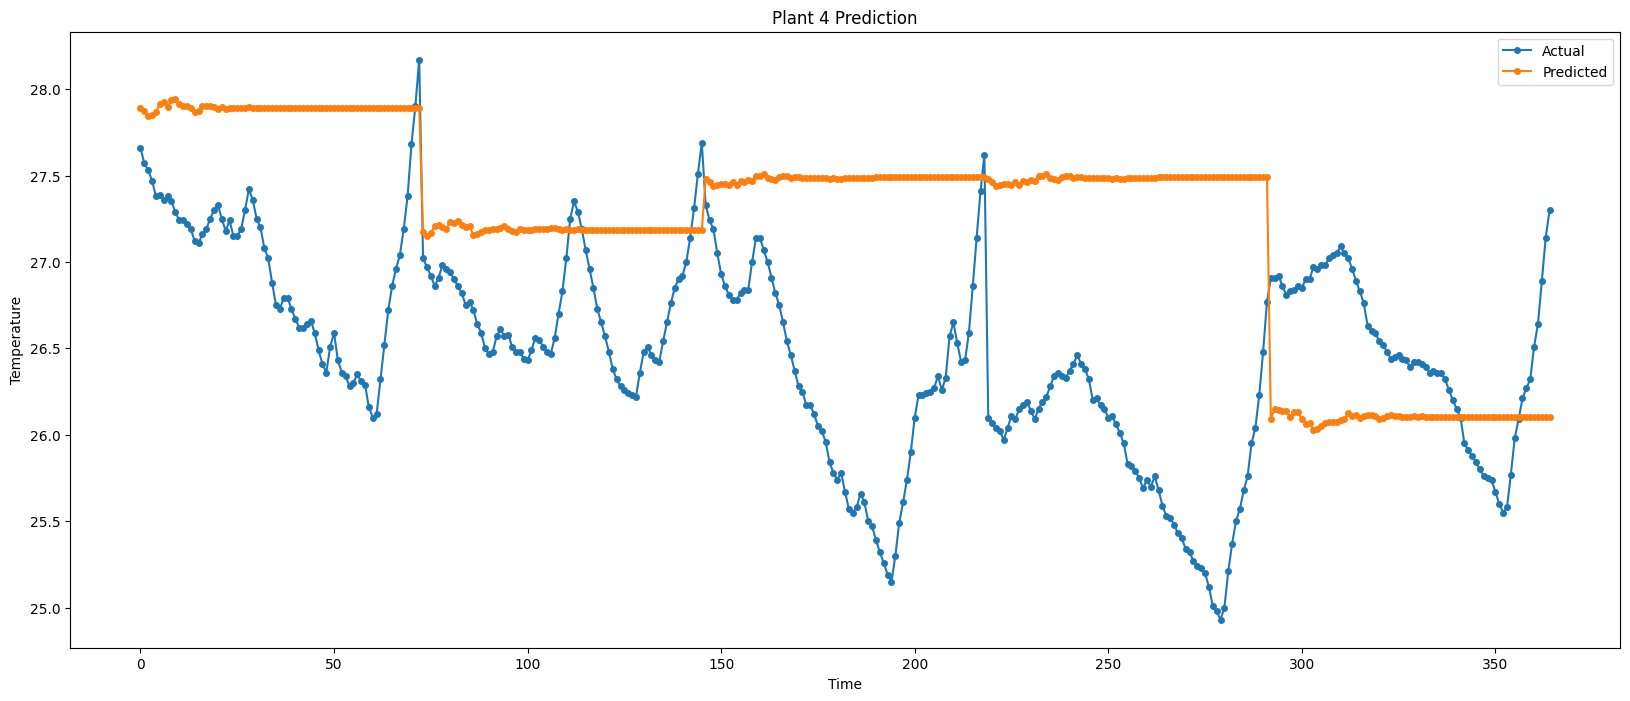

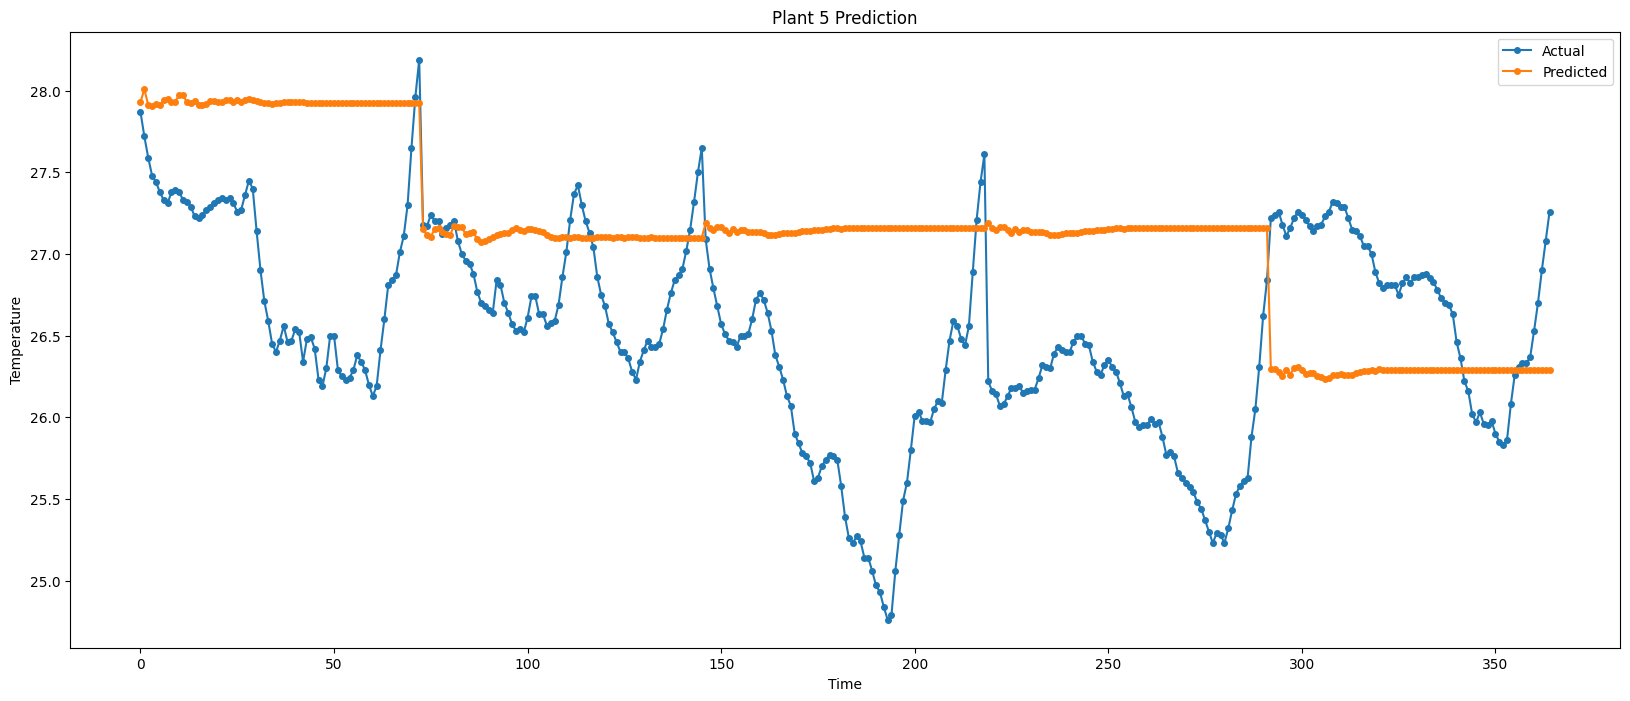

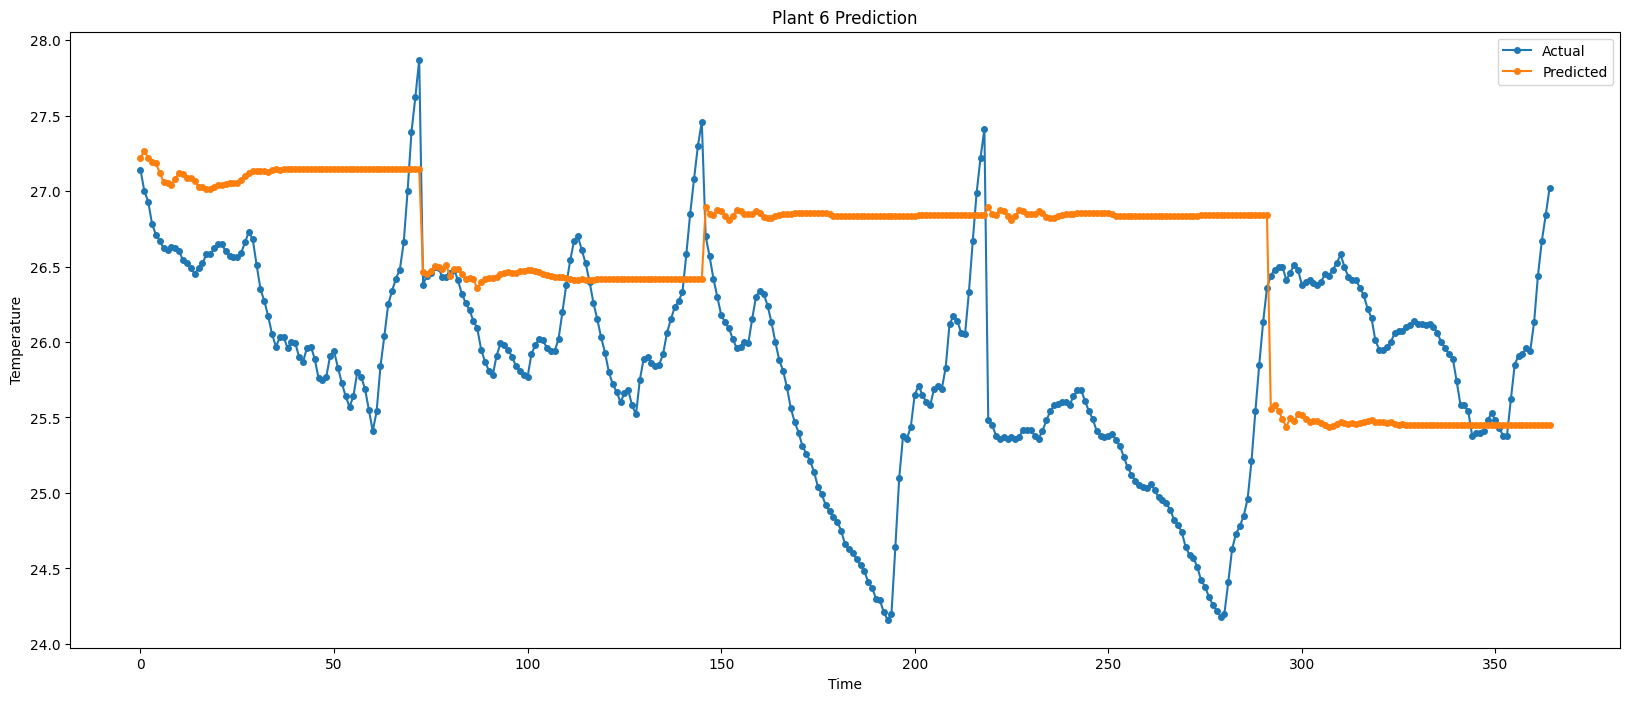

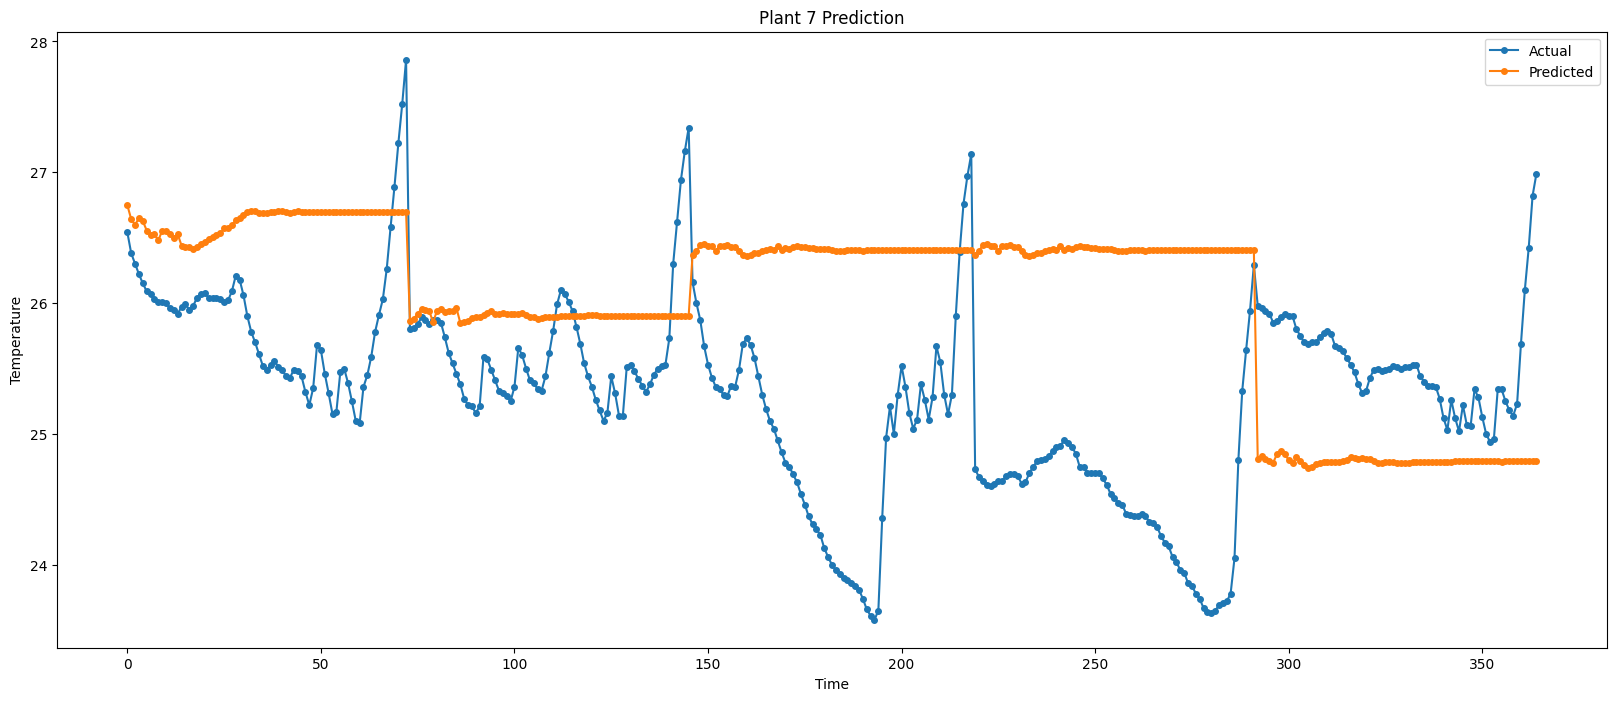

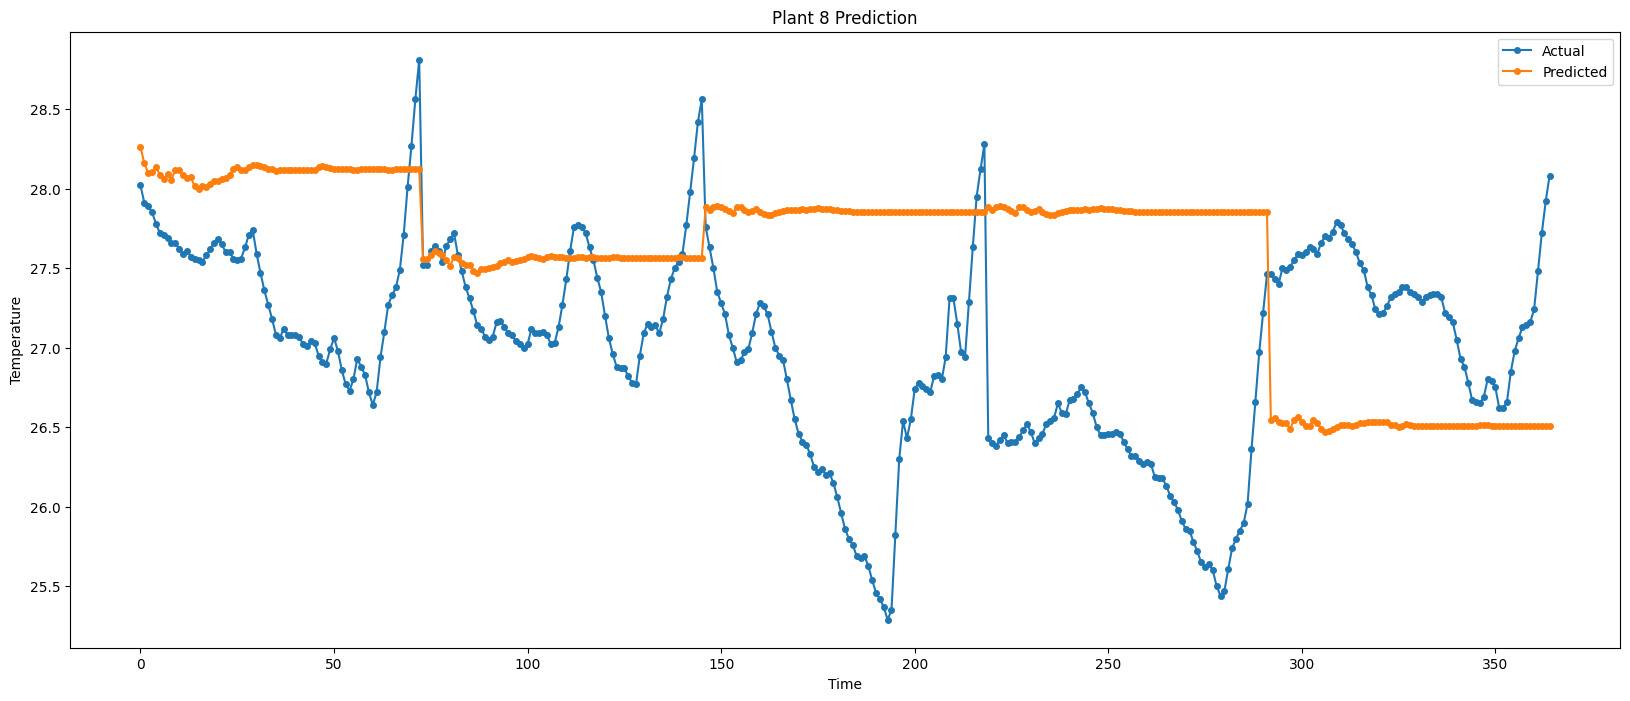

In [34]:
# 전체 plot
for i in range(7):
    plt.figure(figsize=(20, 8))
    # plt.ylim((23,29))
    # plt.yticks(np.arange(23,29,0.5))
    plt.plot(y_true[:,i], label='Actual', marker='o', linestyle='-', markersize=4)
    plt.plot(y_pred[:,i], label='Predicted', marker='o', linestyle='-', markersize=4)
    plt.xlabel('Time')
    plt.ylabel('Temperature')
    plt.legend()
    plt.title(f'Plant {i+2} Prediction')
    plt.show()